# ARIMA

Difference operator: $\triangledown = 1 - B$

Remember:

$$
\triangledown X_t = X_t - X_{t-1} = (1 - B)X_t
$$

So, the random walk model:

$$
\triangledown X_t = X_{t-1} + Z_t
$$

can be written
$$
\triangledown X_t = Z_t
$$

A process X_t is Autoregressive INTEGRATED Moving Average of order (p,d,q) if

$$
Y_t = \triangledown^dX_t = (1-B)^dX_t
$$

**d -- order of differencing**

* Usually d is 1 or 2

## Ljung-Box Q-statistic

A test statisticfor the null hypothesis

$$
H_0: \rho_1 = \rho_2 = \dots = \rho_m = 0
$$

against the alternative hypothesis

$$
H_0: \rho_i \neq 0
$$

Basically we test if there is autocorrelation.

`m` paramter is usually set to log of series length -- `m = log(T)`.

## Modeling

* Trend suggests differencing
* Variation in variance suggests transformation
* Common transformation: log, then differencing -- it is also known as log-return
* ACF suggests order of moving average process (q)
* PACF suggests order of autoregressive process(p)
* Akaike Information Criterion (AIC)
* Sum of squared errors (SSE)
* Ljung-Box Q-statistics


## Daily female births in California in 1959

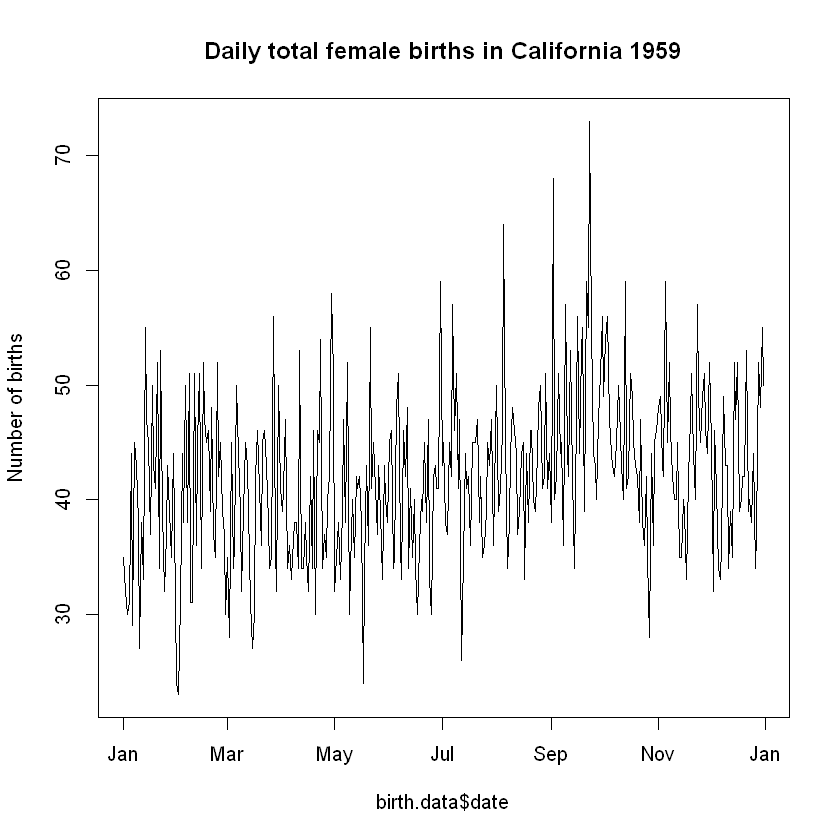

In [1]:
birth.data <- read.csv('daily-total-female-births-CA.csv')
births = birth.data$births
birth.data$date = as.Date(birth.data$date, '%Y-%m-%d')

plot(births ~ birth.data$date, type='l', main='Daily total female births in California 1959', ylab='Number of births')

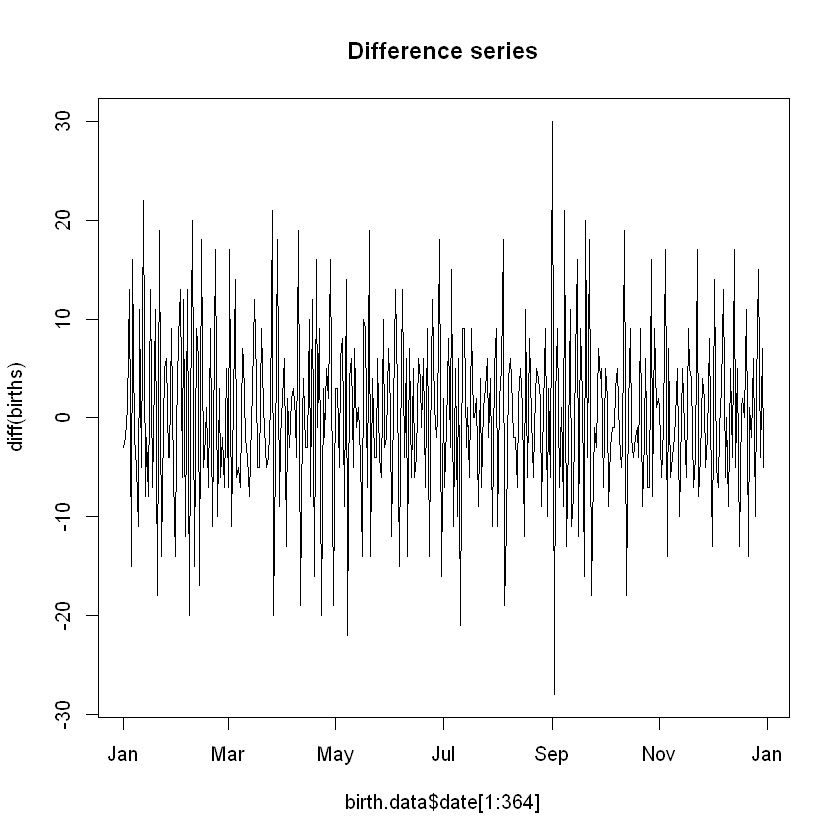

In [2]:
plot(diff(births) ~ birth.data$date[1:364], type='l', main='Difference series')

In [3]:
Box.test(diff(births), lag=log(length(diff(births))))


	Box-Pierce test

data:  diff(births)
X-squared = 78.094, df = 5.8972, p-value = 7.661e-15


p-value is small, so there is autocorrelation.

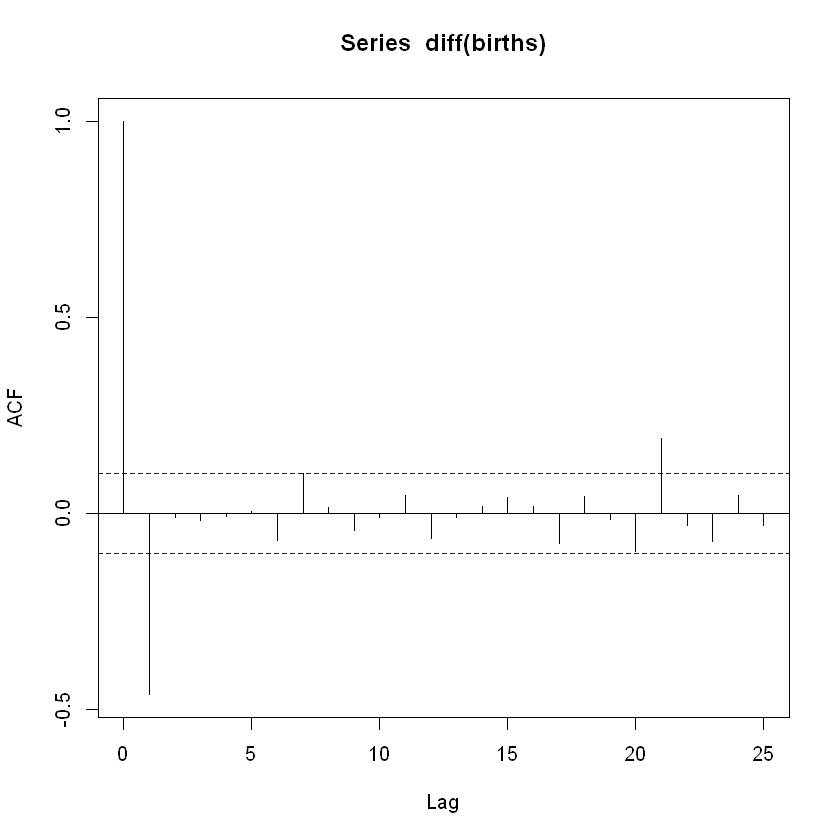

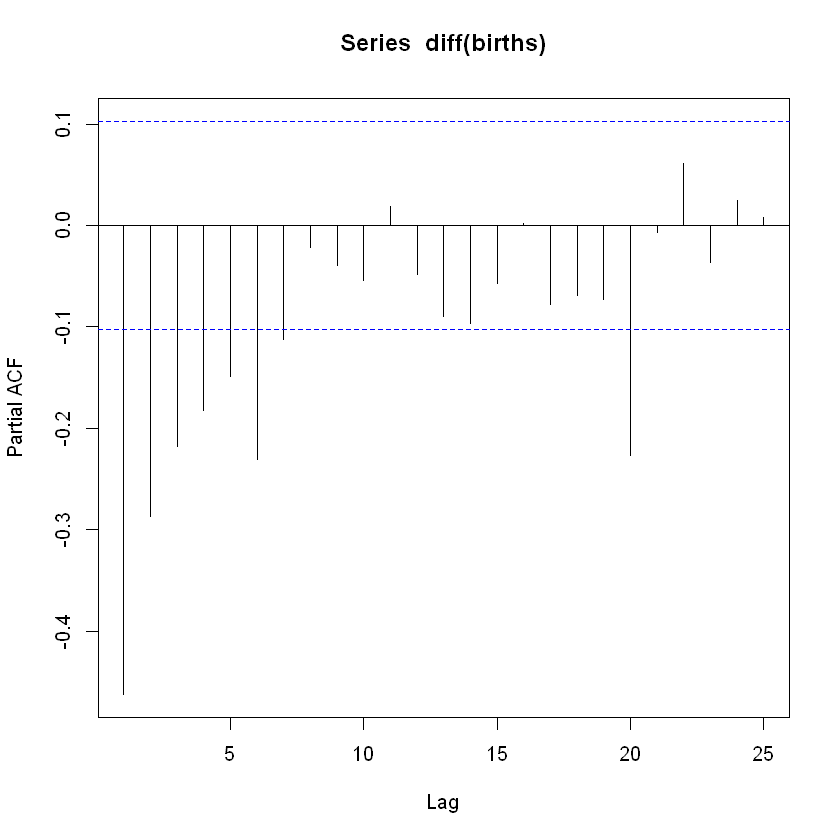

In [4]:
acf(diff(births))
pacf(diff(births))

There is a spike in both ACF and PACF at lag 21 that we can attribute to noise.

**Trying different models**

In [5]:
m1 = arima(births, order=c(0,1,1))
SSE1 = sum(m1$residuals^2)
m1.test = Box.test(m1$residuals, lag=log(length(m1$residuals)))

m2 = arima(births, order=c(0,1,2))
SSE2 = sum(m2$residuals^2)
m2.test = Box.test(m2$residuals, lag=log(length(m2$residuals)))

m3 = arima(births, order=c(7,1,1))
SSE3 = sum(m3$residuals^2)
m3.test = Box.test(m3$residuals, lag=log(length(m3$residuals)))

m4 = arima(births, order=c(7,1,2))
SSE4 = sum(m4$residuals^2)
m4.test = Box.test(m4$residuals, lag=log(length(m4$residuals)))

df = data.frame(row.names=c('AIC', 'SSE', 'p-value'), c(m1$aic, SSE1, m1.test$p.value),
               c(m2$aic, SSE2, m2.test$p.value),
               c(m3$aic, SSE3, m3.test$p.value),
               c(m4$aic, SSE4, m4.test$p.value))
colnames(df) = c('Arima(0,1,1)', 'Arima(0,1,2)', 'Arima(7,1,1)', 'Arima(7,1,2)')
format(df, scientific=F)

,"Arima(0,1,1)","Arima(0,1,2)","Arima(7,1,1)","Arima(7,1,2)"
,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>
AIC,2462.2207021,2459.5705306,2464.8827225,2466.6664136
SSE,18148.4561632,17914.6513437,17584.3902548,17574.0578118
p-value,0.5333604,0.9859227,0.9999899,0.9999929


From the table above:
- the residuals have p-value > $\alpha$, so we can't reject the null-hypothesis that residuals are not correlated -- residual not correlated.
- smallest SSE value is for ARIMA(7,1,2)
- smallest AIC value is for ARIMA(0,1,2)

For some reason AIC was used over SSE with the argument that it is simpler model. Don't remember but I think AIC penalizes for model complexity. Anyways, the model chosen during the class was ARIMA(0,1,2).

initial  value 2.216721 
iter   2 value 2.047518
iter   3 value 1.974780
iter   4 value 1.966955
iter   5 value 1.958906
iter   6 value 1.952299
iter   7 value 1.951439
iter   8 value 1.950801
iter   9 value 1.950797
iter  10 value 1.950650
iter  11 value 1.950646
iter  12 value 1.950638
iter  13 value 1.950635
iter  13 value 1.950635
iter  13 value 1.950635
final  value 1.950635 
converged
initial  value 1.950708 
iter   2 value 1.950564
iter   3 value 1.950290
iter   4 value 1.950196
iter   5 value 1.950185
iter   6 value 1.950185
iter   7 value 1.950185
iter   7 value 1.950185
iter   7 value 1.950185
final  value 1.950185 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), xreg = constant, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
          ma1      ma2  constant
      -0.8511  -0.1113     0.015
s.e.   0.0496   0.0502     0.015

sigma^2 estimated as 49.08:  log likelihood = -1226.36,  aic = 2460.72

$degrees_of_freedom
[1] 361

$ttable
         Estimate     SE  t.value p.value
ma1       -0.8511 0.0496 -17.1448  0.0000
ma2       -0.1113 0.0502  -2.2164  0.0273
constant   0.0150 0.0150   1.0007  0.3176

$AIC
[1] 6.760225

$AICc
[1] 6.760408

$BIC
[1] 6.803051


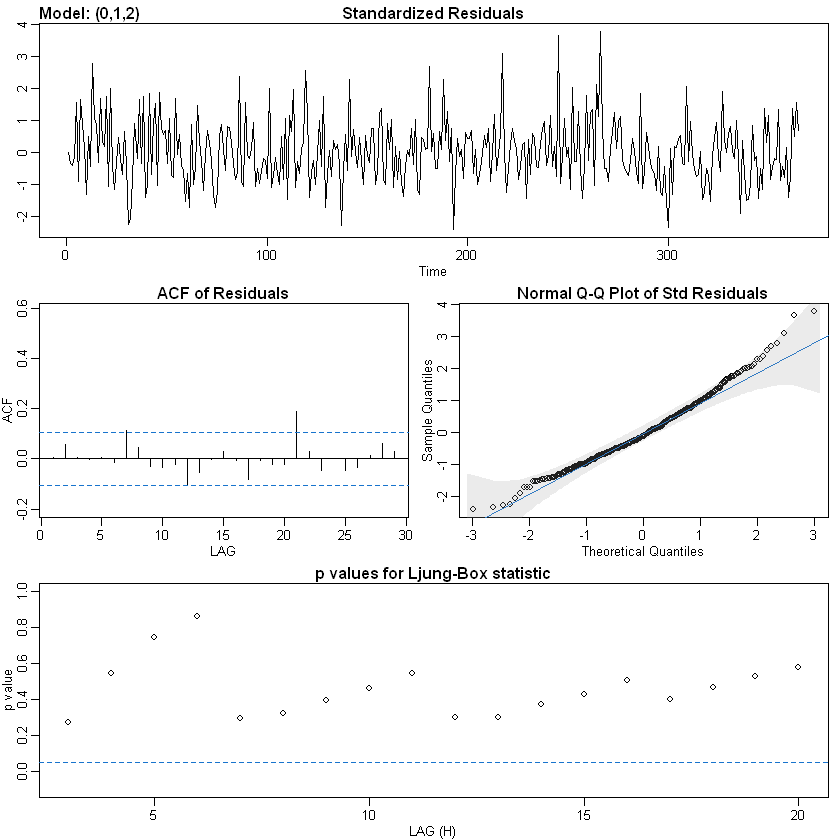

In [8]:
library(astsa)
sarima(births, 0,1,2,0,0,0)

From the above we conclude that our model is:

$$
X_t = X_{t-1} + 0.015 + Z_t - 0.8511 Z_{t-1} - 0.1113 Z_{t-2} \\
Z_t = \text{Normal}(0,49.08)
$$

**Problem**

Given $X_t = \text{BJsales}$ and $Y_t = \text{diff}(\text{diff}(\text{BJsales}))$, and fitted model for $Y_t = Z_t - 0.748Z_{t-1}$, what is the fitted model for X_t?

$$
(1-B)^2X_t = Z_t - 0.748Z_{t-1} \\
X_t - 2X_{t-1} + X_{t-2} = Z_t - 0.748Z_{t-1} \\
X_t = 2X_{t-1} - X_{t-2} + Z_t - 0.748Z_{t-1}
$$